# Project Ladds - a lab for the Datadriven Society
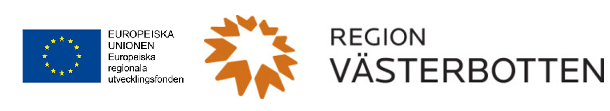


This notebook gives some examples on how to access (open) data from a CKAN-instance. It also shows some examples of basic tinkering with the data and finally gives an example on a basic visualization.

### This example and the technical environment is an Alfa-version. Your advice, code or comments are welcome. Send an email to thomas.kvist@regionvasterbotten.se.
----

The idea is to give you some examples that can be used and hopefully lower the barrier for creating value from (Open) Data and initiating discussion of what data that should be published as Open Data.

It is early stages and anyone who wants to give me new examples or a revised version of the published example(s) are welcome to do so. You can mail me at thomas.kvist@regionvasterbotten. Comments and tips regarding examples, the lab environment ar also welcome to do so.

Unfortunately, I will not be able to provide much support if you run into CKAN, Python or Jupyter related trouble. 

### Important note: Individual notebooks is not backuped right now. To be sure that your notebooks is preserved, please copy your personal Jupyter notebook to your own computer/storage unit to prevent irreversible loss if the lab environment breaks down.###

# Example 1: When should people sensitive for particles avoid Umeå city centre?

This example shows you how to:

Get Open Data from CKAN. CKAN is a common software for Open Data portals.
Sum up the levels of PM10 (particles)and create sums, we create a "day of week"-field and sum up the readings using this field.  
Visualize the result in a diagram
    
Ugly code? Are you a better coder? Probably. Please send me your code so this can be replaced. But please be generoous with comments an instructions, enabling beginners to understand what the code does.   

### Fetch data from a CKAN-driven dataportal
CKAN is a very common portal for Open Data. There is API:s for accessing CKAN and the data and metadata that is stored within the CKAN-portal in question. We are using the portal with the adress http://opendata.opennorth.se You can get information about the API on this address. Se http://docs.ckan.org/en/latest/api   

#### Install the API
The API (if not already present) must be installed. Note: This API is installed in the Ladds environment, but you might want to create your own instance of Jupyter in case this information could be of use.

This is how you install the API in Linux from the terminal:

sudo pip3 install ckanapi

You might have to install pip3 if it has not already been installed. This is done usint this command in the terminal:  

sudo apt-get install python3-pip

#### Check out the API
The API has serveral functions. It makes it possible to get metadata about the files in the portal, e.g listing the grouping of the different files. Using the information in the metadata, you can programatically get the lastet version of a file in a dataset, list newly published files in one or several datasets etc. 

In [ ]:
'''
Check that the API to CKAN is working
(The API is already avalible in the LADDS-environment)
'''
from ckanapi import *
print ('Start')
# Make a test - list the groups that is used for grouping the datasets
ua = 'ckanapiexample/1.0 (+http://example.com/my/website)'

demo = RemoteCKAN('http://opendata.opennorth.se/', user_agent=ua)
groups = demo.action.group_list(id='data-explorer')

print (groups)
print ('Stop')

#### Check out the metadata for the datasets and files (resources)

CKAN uses dataset as the name for a collection of files containing the same information. The individual files are called resources. Datasets can be grouped into "Groups". You can use the information about the datasets and the resources (files) to get the information you nedd to import/acces the files you need. below is an example on how you can access metadata from CKAN.

In [3]:
'''
List metadata for the datasets and files (resources) that exist in the CKAN-instance
'''
from ckanapi import *


counter_datasets = 0
counter_files = 0

on_list_metadata = []
on_dict_metadata = {}
on_dict_orgdata = {}
on_list_resources = []
on_dict_resources = {}
my_dict = {}

print ('Start')

# List all resources (information) connected to each one of the datasets present on the OpenNorth site
ua = 'ckanapiexample/getallresources (+http://example.com/my/website)'

ckaninst_opennorth = RemoteCKAN('http://opendata.opennorth.se/', user_agent=ua)

on_list_metadata = ckaninst_opennorth.action.current_package_list_with_resources(id='data-explorer')

for row in on_list_metadata:
    counter_datasets += 1
    on_dict_metadata = row
    
    on_dict_orgdata = on_dict_metadata['organization']
    
    on_resources_list = on_dict_metadata['resources']
    
    print ('--------------------')
    print ('Dataset number:', counter_datasets)
    print ('Title of Dataset:', on_dict_metadata['title'])
    print ('Type of Licence:', on_dict_metadata['license_title'])
    print ('Organization Description:', on_dict_orgdata['description'])

    for row in on_resources_list:
        on_dict_resources = row
          
        if on_dict_resources['format'] != 'RDF':    # Do not want RDF-files
            print ('---')
            print ('Format:', on_dict_resources['format'])
            print ('URL:', on_dict_resources['url'])
            print ('Description:', on_dict_resources['description'])
            counter_files +=1

print ('Number of datasets:',counter_datasets)
print ('Number of files (files with some formats may be excluded):',counter_files)
print ('Stop')

Start
--------------------
Dataset number: 1
Title of Dataset: Adresses Skelleftea
Type of Licence: Other (Public Domain)
Organization Description: The municipality of Skelleftea. (Skellefteå kommun)    

[Link](http://www.skelleftea.se/psidata) to linked data from Kolada.
---
Format: CSV
URL: https://openumea-storage.s3.amazonaws.com/2016-12-20T15:10:20/Adress_fastigheter.csv
Description: 
---
Format: CSV
URL: https://openumea-storage.s3.amazonaws.com/2017-09-22T06:26:36/Adress_fastigheter.csv
Description: 
--------------------
Dataset number: 2
Title of Dataset: School menu
Type of Licence: Other (Public Domain)
Organization Description: The municipality of Skelleftea. (Skellefteå kommun)    

[Link](http://www.skelleftea.se/psidata) to linked data from Kolada.
---
Format: CSV
URL: https://openumea-storage.s3.amazonaws.com/2016-06-23T14:24:56.709Z/school-menu.csv
Description: 
--------------------
Dataset number: 3
Title of Dataset: Energy/water consumption properties Skelleftea
Type

If you already know the name of the dataset and want a list of what files(resources) that are present in that dataset you can run a variant of the script above 

In [ ]:
'''
List metadata for a specific dataset and the files (resources) within the dataset
'''
from ckanapi import *

on_list_metadata = []
on_dict_metadata = {}
on_dict_orgdata = {}
on_list_resources = []
on_dict_resources = {}
my_dict = {}

print ('Start')

# List all resources (information) connected to each one of the datasets present on the OpenNorth site
ua = 'ckanapiexample/getallresources (+http://example.com/my/website)'
ckaninst_opennorth = RemoteCKAN('http://opendata.opennorth.se/', user_agent=ua)

on_list_metadata = ckaninst_opennorth.action.current_package_list_with_resources(id='data-explorer')

for row in on_list_metadata:
    on_dict_metadata = row
    on_dict_orgdata = on_dict_metadata['organization']
    
    on_list_resources = on_dict_metadata['resources']
    
    for row in on_list_resources:
        on_dict_resources = row
        
# Just looking for files in the 'Environment' dataset        
        if on_dict_metadata['title'] == 'Environment':
            print ('---')
            print ('Format:', on_dict_resources['format'])
            print ('URL:', on_dict_resources['url'])
            print ('Description:', on_dict_resources['description'])
            
print ('Stop')

#### Create a locally testfile stored in Jupyter
It is easy to create a copy of the file in a CKAN-instance on a file in Jupyter, making it possible to use the file later without needing to create the same file over and over. This is probably the best way to go in most cases

In [8]:
'''
Create a testfile stored in Jupyter
'''
import csv
import datetime as dt
import urllib.request
import os.path

count_read = 0
count_write = 0

# Location and name of the testfile I want to create
fout_airquality_path1 ='/home/ubuntu/pynb/' # Jupyter path - cant be changed
fout_airquality_path2 = 'Examples_Testdata/Example1/' # Name of folder for your testdata. Change to your path 
fout_airquality_name = 'airquality_umea_test.csv' # Name of the file
fout_airquality = fout_airquality_path1 + fout_airquality_path2 + fout_airquality_name

# URL to the file in the CKAN-instance
url_fin = 'http://ckan.openumea.se/datastore/dump/27fb8bcc-23cb-4e85-b5b4-fde68a8ef93a'

print ('Start')

# Delete existing file if you want to create a new testfile
if os.path.isfile(fout_airquality) is True:
    os.remove(fout_airquality)

# Create a file if it doesn't already exist
if os.path.isfile(fout_airquality) is False:
    with open(fout_airquality, 'xt') as fout:
        
# Downloading and creating a new file
        with urllib.request.urlopen(url_fin) as response:
            airquality_data_bytes = response.read()
            airquality_data_string = airquality_data_bytes.decode(encoding='UTF-8')
        
            fout.write(airquality_data_string)
            fout.close()
            print ('Testfile in Jupyter created') 
            print('   Folder:', fout_airquality_path2, 'Filename:', fout_airquality_name)

print('Stop')

Start
Testfile in Jupyter created
   Folder: Examples_Testdata/Example1/ Filename: airquality_umea_test.csv
Stop


#### Create a locally stored testfile

It is also easy to create a copy of the file in a CKAN-instance on your own compyter/file storage. A testfile outside of CKAN is used below. I have used the file containing the airquiality in Umea. I am using the CSV-file and the url listed för that format

In [ ]:
'''
Create a testfile stored on your own computer
'''
import csv
import datetime as dt
import urllib.request
import os.path

count_read = 0
count_write = 0

# Location and name of the testfile I want to create and use
file_airquality = '/Users/thkvi/Desktop/airquality_umea_test.csv' # You choose your own path and name

# URL to the file in the CKAN-instance
url = 'http://ckan.openumea.se/datastore/dump/27fb8bcc-23cb-4e85-b5b4-fde68a8ef93a'

print ('Start')

# Delete existing file if you want to create a new testfile
if os.path.isfile(file_airquality) is True:
    os.remove(file_airquality)

# Create a file if it doesn't already exist
if os.path.isfile(file_airquality) is False:
    with open(file_airquality, 'xt') as fout:
        
# Downloading and creating a new file
        with urllib.request.urlopen(url) as response:
            airquality_data_bytes = response.read()
            airquality_data_string = airquality_data_bytes.decode(encoding='UTF-8')
        
            fout.write(airquality_data_string)
            fout.close()
            print ('Local testfile created')

print('Stop')

#### Buckets in Amazon S3
S3 is a storage soulution provided by Amazon. It is probably not neccessary to use this type storage unless the files are very large. This can be a bit more complicated and might also generate extra costs. So use this way of storing file with some caution.

#### List buckets in S3
You might to get a list of the buckets that exists. If you run the code below, your whish will become true.  

In [ ]:
# Print out bucket names
import boto3

s3 = boto3.resource('s3')

print ('Start')

for bucket in s3.buckets.all():
   print(bucket.name)

print ('Stop')

#### Create a testfile stored in S3

If you want, you can create a testfile in a bucket on Amazons S3. That can be a wise if your files ar large.

In [6]:
'''
Create a testfile stored on S3
'''
import os.path
import urllib.request
import boto3
from botocore.client import Config

count_read = 0
count_write = 0

s3 = boto3.resource('s3')


# URL to the file in the CKAN-instance
url_fin = 'http://ckan.openumea.se/datastore/dump/27fb8bcc-23cb-4e85-b5b4-fde68a8ef93a'


# Location and name of the files on S3 I want to create and use. The bucket must be exist before it can be used
my_bucket = 'testladdsexamples'
key_fin = 'Example1/airquality_umea_test.csv'

print ('Start')

# Downloading from CKAN and creating a new locally stored testfile
with urllib.request.urlopen(url_fin) as response:
    airquality_content_bytes = response.read()
    print ('File downloaded from CKAN')
    airquality_content_string = airquality_content_bytes.decode(encoding='UTF-8')
    
# Upload a locally stored testfile to S3 (by filename)
s3.Object(my_bucket, key_fin).put(Body=(airquality_content_string))

print ('Testfile transferred to S3')
        
print('Stop')

Start
File downloaded from CKAN
Testfile transferred to S3
Stop


### Add information to the downloaded file 

Create a new "day of week"-field using the existing datefield. Setting 1 for Monday, 2 for Tuesday etc. Some fields we are uninterested are discarded. The result is written in a new file. 

In [9]:
'''
Create a new "day of week"-field using the existing datefield. Setting 1 for Monday, 2 
for Tuesday etc. Some fields we are uninterested in is discarded. The result is written in a new file.
'''
import csv
import datetime as dt
# import urllib.request
import os.path

count_read = 0
count_write = 0


# Location and name of files I want to read and create. Files are stored in Jupyter 
fin_airquality_path1 ='/home/ubuntu/pynb/' # Jupyter path - cant be changed
fin_airquality_path2 = 'Examples_Testdata/Example1/' # Name of folder for your testdata. Change to your path 
fin_airquality_name = 'airquality_umea_test.csv' # Name of the file
fin_airquality = fin_airquality_path1 + fin_airquality_path2 + fin_airquality_name

fout_airquality_path1 ='/home/ubuntu/pynb/' # Jupyter path - cant be changed
fout_airquality_path2 = 'Examples_Testdata/Example1/' # Name of folder for your testdata. Change to your path 
fout_airquality_name = 'airquality_umea_test_rev.csv' # Name of the file
fout_airquality = fout_airquality_path1 + fout_airquality_path2 + fout_airquality_name

list_air_quality = []

print ('Start')
    
with open(fin_airquality, 'r', encoding='utf-8') as fin:
    datareader_fin = csv.reader(fin, delimiter=',')
    
# Moving the infile into a list
    for row in datareader_fin:
        count_read += 1
        list_air_quality.append(row)

with open (fout_airquality, 'w') as fout:
    datawriter_fout = csv.writer(fout, delimiter=',')
    
# Writing the data
    for row in list_air_quality:

# Writing a row with field names
        if count_write == 0:
            lineout = ['Date', 'Time', 'Weekday', 'Level_PM10']
        else:
# Creating av file with date, time, weekday and level of PM10
            mdatetime = row[6]
            mdate = mdatetime[0:10]
            mtime = mdatetime[11:16]
            mdateindateformat = dt.datetime.strptime(mdate,"%Y-%m-%d")
            mweekday = dt.date.isoweekday(mdateindateformat)
            
            lineout = [mdate, mtime, str(mweekday), row[10]]   
            
        datawriter_fout.writerow(lineout)
        count_write += 1                   
      
print ('Rows read:', count_read)
print ('Rows written:', count_write)       
print ('Stop') 

Start
Rows read: 93424
Rows written: 93424
Stop


### Summing up the levels of particles (PM10) on each weekday to see if some day has more pollution than others. Also creating a very basic visualization

Start
Statistics
Rows read: 93424
Sum of PM10 readings on Mondays: 181192
Sum of PM10 readings on Tuesdays: 187591
Sum of PM10 readings on Wednesdays: 591244
Sum of PM10 readings on Thursdays: 198150
Sum of PM10 readings on Fridays: 179097
Sum of PM10 readings on Saturdays: 124816
Sum of PM10 readings on Sundays: 128321


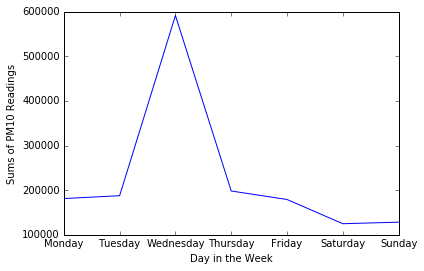

Stop


In [2]:
'''
Summing up the levels of particles (PM10) on each weekday to see if some day 
has more pollution than others. Also creating a very basic visualization
'''
import csv
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

count_read = 0
count_write = 0

# Path for the testfile I want to use (file stored in Jupyter, folder "Examples_Testdata")
fin_airquality_path1 ='/home/ubuntu/pynb/' # Jupyter path - cant be changed
fin_airquality_path2 = 'Examples_Testdata/Example1/' # Name of folder for your testdata. Change to your path 
fin_airquality_name = 'airquality_umea_test_rev.csv' # Name of the file
fin_airquality_rev = fin_airquality_path1 + fin_airquality_path2 + fin_airquality_name

sums = []
days = [1,2,3,4,5,6,7]

sum_monday = 0
sum_tuesday = 0
sum_wednesday = 0
sum_thursday = 0
sum_friday = 0
sum_saturday = 0
sum_sunday = 0

print ('Start')
  
# Use file stored in Jupyter
with open(fin_airquality_rev, 'r', encoding='utf-8') as fin:
    datareader_fin = csv.reader(fin, delimiter=',')

    for row in datareader_fin:
        count_read += 1
        if count_read > 1:
            int_weekday = int(row[2])
            int_levelPM10 = int(row[3])
            if int_weekday == 1:
                sum_monday += int_levelPM10
            elif int_weekday == 2:
                sum_tuesday += int_levelPM10
            elif int_weekday == 3:
                sum_wednesday += int_levelPM10
            elif int_weekday == 4: 
                sum_thursday += int_levelPM10
            elif int_weekday == 5: 
                sum_friday += int_levelPM10
            elif int_weekday == 6: 
                sum_saturday += int_levelPM10
            elif int_weekday == 7: 
                sum_sunday += int_levelPM10
            else:
                print ('error in daynumber:',row[2])
        
    sums.append(int(sum_monday))
    sums.append(int(sum_tuesday))
    sums.append(int(sum_wednesday))
    sums.append(int(sum_thursday))
    sums.append(int(sum_friday))
    sums.append(int(sum_saturday))
    sums.append(int(sum_sunday))
        
    print ('Statistics')
    print ('Rows read:', count_read)
                                                  
    print ('Sum of PM10 readings on Mondays:', sum_monday)
    print ('Sum of PM10 readings on Tuesdays:', sum_tuesday)
    print ('Sum of PM10 readings on Wednesdays:', sum_wednesday)
    print ('Sum of PM10 readings on Thursdays:', sum_thursday)
    print ('Sum of PM10 readings on Fridays:', sum_friday)
    print ('Sum of PM10 readings on Saturdays:', sum_saturday)
    print ('Sum of PM10 readings on Sundays:', sum_sunday)
    
    plt.plot(days,sums)
    plt.xlabel('Day in the Week')
    plt.ylabel('Sums of PM10 Readings')
    my_xticks = ['Monday', 'Tuesday', 'Wednesday','Thursday', 'Friday', 'Saturday', 'Sunday']
    plt.xticks (days, my_xticks)
    plt.grid=('True')
    plt.show()

print ('Stop')


Now you can see how much particles in total that has been measured by the city of Umea, summed up on each weekday. If the result are surprising, the cause is perhaps related to the dataquality. That can be explored using different statistical methods and vizualisations. Perhaps something that you want to test?  